In [1]:
import pandas as pd

# Load the datasets to inspect their contents
file_paths = {
    "Rainfall Forecast": r"C:\Users\pikum\OneDrive\Desktop\Hacknite\placeholder_repeated_monthly_avg_rainfall_2015_2025_predicted.csv",
    #"Station AQI": "/mnt/data/station_id_name_aqi.csv",
    "Sunshine Forecast": r"C:\Users\pikum\OneDrive\Desktop\Hacknite\Monthly_Sunshine_Forecast_2015_2025.csv",
    "Pollution Data": r"C:\Users\pikum\OneDrive\Desktop\Hacknite\AQI(dcb).csv",
    #"Wind Speed Stats": "/mnt/data/india_wind_speed_statistics.csv",
    #"Wind Speed Data": "/mnt/data/india_wind_speed_data.csv",
}

# Read and display basic info about each dataset
datasets = {}
for name, path in file_paths.items():
    try:
        df = pd.read_csv(path, nrows=5)  # Load only first 5 rows to check structure
        datasets[name] = df
    except Exception as e:
        datasets[name] = f"Error loading: {e}"

datasets


{'Rainfall Forecast': "Error loading: [Errno 2] No such file or directory: 'C:\\\\Users\\\\pikum\\\\OneDrive\\\\Desktop\\\\Hacknite\\\\placeholder_repeated_monthly_avg_rainfall_2015_2025_predicted.csv'",
 'Sunshine Forecast':         City  Year  Month Month_Name  Sunshine_Hours
 0  Bengaluru  2015      1    January           251.2
 1  Bengaluru  2015      2   February           247.4
 2  Bengaluru  2015      3      March           291.9
 3  Bengaluru  2015      4      April           270.8
 4  Bengaluru  2015      5        May           241.7,
 'Pollution Data':         City  Year  Month         AQI
 0  Bengaluru  2015      1  120.540000
 1  Bengaluru  2015      2  101.230000
 2  Bengaluru  2015      3  130.545455
 3  Bengaluru  2015      4  113.733333
 4  Bengaluru  2015      5  102.774193}

In [27]:
# Load full datasets for processing
rain_forecast = pd.read_csv("Rainfall_updated(2015-2025).csv")
#station_aqi = pd.read_csv("station_id_name_aqi.csv")
sunshine_forecast = pd.read_csv("Monthly_Sunshine_Forecast_2015_2025.csv")
pollution_data = pd.read_csv("AQI(dcb).csv")
#wind_speed_stats = pd.read_csv("india_wind_speed_statistics.csv")
#wind_speed_data = pd.read_csv("india_wind_speed_data.csv")

# Drop unnecessary columns
pollution_data = pollution_data.drop(columns=["Unnamed: 0"], errors="ignore")

# Merge AQI and pollution datasets
rain_pollution_merged = pd.merge(rain_forecast, pollution_data, on=["City", "Year", "Month"], how="inner", suffixes=("_forecast", "_actual"))

# Merge with sunshine data
merged_data = pd.merge(rain_pollution_merged, sunshine_forecast, on=["City", "Year", "Month"], how="inner")

# Merge with wind speed data
#merged_data = pd.merge(merged_data, wind_speed_data, on=["City"], how="left")

# Display first few rows of merged dataset

merged_data.drop("Month_Name", inplace=True, axis=1)

print(merged_data.head())
merged_data.to_csv('FINAL_DATASET.csv')


    City  Year  Month  Rainfall in mm         AQI  Sunshine_Hours
0  Delhi  2015      1            12.4  342.290323           196.1
1  Delhi  2015      2             6.6  327.928571           214.1
2  Delhi  2015      3            71.8  256.064516           243.4
3  Delhi  2015      4            34.8  305.266667           241.0
4  Delhi  2015      5             8.4  348.580645           254.5


In [5]:
import os
print(os.getcwd())

print(os.listdir())

c:\Users\pikum\OneDrive\Desktop\Hacknite
['ALL OTHER', 'AQI(dcb).csv', 'city_day.csv', 'CORRELATION MODEL.ipynb', 'ML Model 2.ipynb', 'monthly_avg_rainfall_2015.csv', 'Monthly_Sunshine_Forecast_2015_2025.csv', 'placeholder_repeated_monthly_avg_rainfall_2015_2025_predicted.csv', 'Project Bolt', 'rainfall_predictions_per_city_2015_2025.csv']


In [10]:
# Display column names for all datasets to identify mismatches
'''{
    "AQI Forecast": aqi_forecast.columns.tolist(),
    "Station AQI": station_aqi.columns.tolist(),
    "Sunshine Forecast": sunshine_forecast.columns.tolist(),
    "Pollution Data": pollution_data.columns.tolist(),
    "Wind Speed Stats": wind_speed_stats.columns.tolist(),
    "Wind Speed Data": wind_speed_data.columns.tolist(),
}
'''

'{\n    "AQI Forecast": aqi_forecast.columns.tolist(),\n    "Station AQI": station_aqi.columns.tolist(),\n    "Sunshine Forecast": sunshine_forecast.columns.tolist(),\n    "Pollution Data": pollution_data.columns.tolist(),\n    "Wind Speed Stats": wind_speed_stats.columns.tolist(),\n    "Wind Speed Data": wind_speed_data.columns.tolist(),\n}\n'

In [ ]:
'''# Standardize column name
wind_speed_stats.rename(columns={"city": "City"}, inplace=True)
wind_speed_data.rename(columns={"city": "City"}, inplace=True)

# Merge AQI and pollution datasets
aqi_pollution_merged = pd.merge(aqi_forecast, pollution_data, on=["City", "Year", "Month"], how="outer", suffixes=("_forecast", "_actual"))

# Merge with sunshine data
merged_data = pd.merge(aqi_pollution_merged, sunshine_forecast, on=["City", "Year", "Month"], how="outer")

# Merge with wind speed stats (city-level aggregated data)
merged_data = pd.merge(merged_data, wind_speed_stats, on=["City"], how="left")

# Display first few rows of merged dataset
merged_data.head()
'''

,City,Year,Month,AQI_forecast,AQI_actual,Month_Name,Sunshine_Hours,region,wind_speed_ms,wind_speed_ms.1,wind_speed_ms.2,wind_speed_ms.3,wind_speed_kmh,wind_speed_kmh.1,wind_speed_kmh.2,wind_speed_kmh.3,beaufort_scale,beaufort_scale.1,beaufort_scale.2
0,Bengaluru,2015,1,NaN,NaN,January,251.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bengaluru,2015,2,NaN,NaN,February,247.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bengaluru,2015,3,NaN,130.545455,March,291.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bengaluru,2015,4,NaN,113.733333,April,270.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bengaluru,2015,5,NaN,102.774194,May,241.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
'''# Fill missing wind speed values with the average per city where possible
wind_speed_stats.fillna(wind_speed_stats.mean(numeric_only=True), inplace=True)

# Merge again after filling missing values
merged_data = pd.merge(aqi_pollution_merged, sunshine_forecast, on=["City", "Year", "Month"], how="outer")
merged_data = pd.merge(merged_data, wind_speed_stats, on=["City"], how="left")

# Drop redundant columns (e.g., multiple wind speed entries)
columns_to_drop = [col for col in merged_data.columns if "wind_speed_ms." in col or "wind_speed_kmh." in col or "beaufort_scale." in col]
merged_data.drop(columns=columns_to_drop, inplace=True)

# Display cleaned dataset
merged_data.head()
'''

,City,Year,Month,AQI_forecast,AQI_actual,Month_Name,Sunshine_Hours,region,wind_speed_ms,wind_speed_kmh,beaufort_scale
0,Bengaluru,2015,1,NaN,NaN,January,251.2,NaN,NaN,NaN,NaN
1,Bengaluru,2015,2,NaN,NaN,February,247.4,NaN,NaN,NaN,NaN
2,Bengaluru,2015,3,NaN,130.545455,March,291.9,NaN,NaN,NaN,NaN
3,Bengaluru,2015,4,NaN,113.733333,April,270.8,NaN,NaN,NaN,NaN
4,Bengaluru,2015,5,NaN,102.774194,May,241.7,NaN,NaN,NaN,NaN


In [11]:
'''
# Convert wind speed columns to numeric values (forcing errors='coerce' to handle non-numeric cases)
merged_data["wind_speed_ms"] = pd.to_numeric(merged_data["wind_speed_ms"], errors="coerce")
merged_data["wind_speed_kmh"] = pd.to_numeric(merged_data["wind_speed_kmh"], errors="coerce")

# Interpolate missing values using city-wise grouping
merged_data.sort_values(["City", "Year", "Month"], inplace=True)  # Ensure chronological order for interpolation
merged_data["wind_speed_ms"] = merged_data.groupby("City")["wind_speed_ms"].apply(lambda x: x.interpolate())
merged_data["wind_speed_kmh"] = merged_data.groupby("City")["wind_speed_kmh"].apply(lambda x: x.interpolate())
'''
# Display cleaned dataset after interpolation
merged_data.head()


,City,Year,Month,Rainfall in mm,AQI,Month_Name,Sunshine_Hours
0,Chennai,2015,1,8.3,130.220000,January,217.9
1,Chennai,2015,2,2.3,245.980000,February,224.0
2,Chennai,2015,3,21.7,363.800000,March,282.0
3,Chennai,2015,4,108.8,175.862069,April,290.3
4,Chennai,2015,5,112.4,176.129032,May,311.5


In [12]:
'''
# Fill remaining NaNs with city-wise mean wind speed
merged_data["wind_speed_ms"] = merged_data.groupby("City")["wind_speed_ms"].transform(lambda x: x.fillna(x.mean()))
merged_data["wind_speed_kmh"] = merged_data.groupby("City")["wind_speed_kmh"].transform(lambda x: x.fillna(x.mean()))

# Fill any remaining NaNs with the overall dataset mean
merged_data["wind_speed_ms"].fillna(merged_data["wind_speed_ms"].mean(), inplace=True)
merged_data["wind_speed_kmh"].fillna(merged_data["wind_speed_kmh"].mean(), inplace=True)
'''
# Display cleaned dataset
merged_data.head()


,City,Year,Month,Rainfall in mm,AQI,Month_Name,Sunshine_Hours
0,Chennai,2015,1,8.3,130.220000,January,217.9
1,Chennai,2015,2,2.3,245.980000,February,224.0
2,Chennai,2015,3,21.7,363.800000,March,282.0
3,Chennai,2015,4,108.8,175.862069,April,290.3
4,Chennai,2015,5,112.4,176.129032,May,311.5


In [39]:
# Feature Engineering

# Normalize AQI for energy calculation (assuming AQI scale is 0-500)
#merged_data["AQI_scaled"] = merged_data["AQI"] /500
# Compute solar energy potential (more sunshine & lower AQI = better solar efficiency)
merged_data["Solar_Potential"] = merged_data["Sunshine_Hours"] * (1 - (merged_data["AQI"])/500)

# Compute wind energy potential (simple scaling of wind speed)
#merged_data["Wind_Energy_Potential"] = merged_data["wind_speed_ms"] ** 3  # Wind power ~ cube of wind speed

# Identify high-pollution areas for green spaces (AQI > 150 is considered unhealthy)
merged_data["Green_Space_Need"] = (merged_data["AQI"] > 150).astype(int)

# Display updated dataset
merged_data.head()


,City,Year,Month,Rainfall in mm,AQI,Sunshine_Hours,AQI_scaled,Solar_Potential,Green_Space_Need
0,Delhi,2015,1,12.4,342.290323,196.1,0.684581,61.853735,1
1,Delhi,2015,2,6.6,327.928571,214.1,0.655857,73.680986,1
2,Delhi,2015,3,71.8,256.064516,243.4,0.512129,118.747794,1
3,Delhi,2015,4,34.8,305.266667,241.0,0.610533,93.861467,1
4,Delhi,2015,5,8.4,348.580645,254.5,0.697161,77.072452,1


In [40]:
from sklearn.cluster import KMeans
import numpy as np

# Select relevant features for clustering
clustering_features = merged_data[["Solar_Potential", "Green_Space_Need"]].dropna()

# Determine optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(clustering_features)
    wcss.append(kmeans.inertia_)

# Return WCSS values for elbow method analysis
wcss


[888128.5882254353,
 290619.5656130683,
 146242.62094775162,
 91750.15158768333,
 57419.197398611504,
 40494.5847104002,
 29738.582379256633,
 21942.88690505854,
 17282.629932268977,
 14585.989298505034]

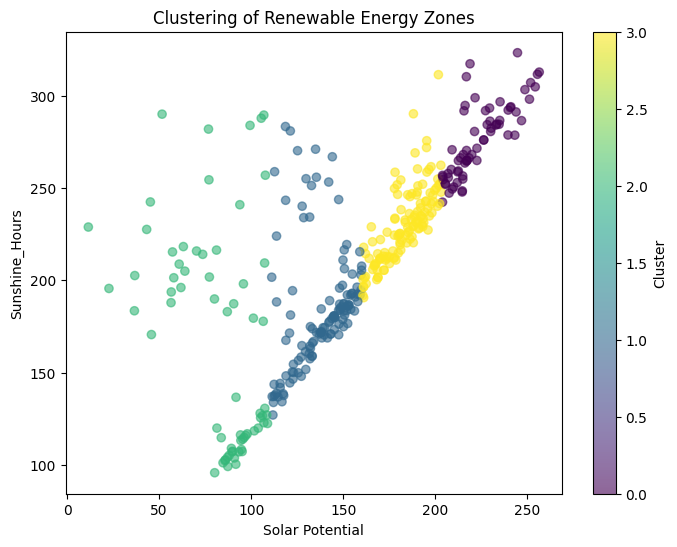

,City,Solar_Potential,Sunshine_Hours,Cluster
0,Delhi,61.853735,196.1,2
1,Delhi,73.680986,214.1,2
2,Delhi,118.747794,243.4,1
3,Delhi,93.861467,241.0,2
4,Delhi,77.072452,254.5,2
5,Delhi,90.528333,187.3,2
6,Delhi,106.576761,177.8,2
7,Delhi,101.214839,179.5,2
8,Delhi,128.559600,234.0,1
9,Delhi,99.400000,284.0,2


In [45]:
import matplotlib.pyplot as plt

# Apply K-Means clustering with 4 clusters
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
merged_data["Cluster"] = kmeans.fit_predict(clustering_features)

# Scatter plot of clusters
plt.figure(figsize=(8,6))
plt.scatter(merged_data["Solar_Potential"], merged_data["Sunshine_Hours"], c=merged_data["Cluster"], cmap="viridis", alpha=0.6)
plt.xlabel("Solar Potential")
plt.ylabel("Sunshine_Hours")
plt.title("Clustering of Renewable Energy Zones")
plt.colorbar(label="Cluster")
plt.show()

# Display sample of clustered data
merged_data[["City", "Solar_Potential", "Sunshine_Hours", "Cluster"]].head(10)


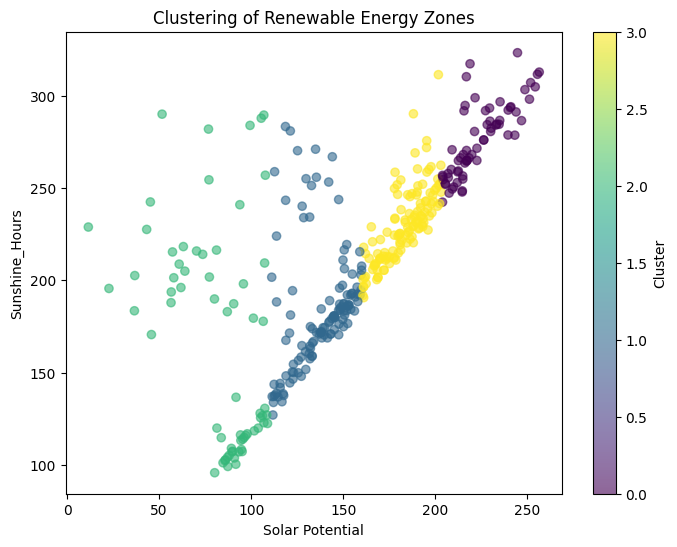

,City,Solar_Potential,Sunshine_Hours,Cluster
0,Delhi,61.853735,196.1,2
1,Delhi,73.680986,214.1,2
2,Delhi,118.747794,243.4,1
3,Delhi,93.861467,241.0,2
4,Delhi,77.072452,254.5,2
5,Delhi,90.528333,187.3,2
6,Delhi,106.576761,177.8,2
7,Delhi,101.214839,179.5,2
8,Delhi,128.559600,234.0,1
9,Delhi,99.400000,284.0,2


In [46]:
# Perform clustering only on non-null rows and store the results separately
clustering_results = pd.DataFrame(index=clustering_features.index)
clustering_results["Cluster"] = kmeans.fit_predict(clustering_features)

# Merge cluster labels back into the full dataset, ensuring correct alignment
merged_data["Cluster"] = np.nan  # Initialize cluster column with NaN
merged_data.loc[clustering_results.index, "Cluster"] = clustering_results["Cluster"]

# Convert cluster column to integer (after filling NaNs)
merged_data["Cluster"] = merged_data["Cluster"].fillna(-1).astype(int)

# Scatter plot of clusters
plt.figure(figsize=(8,6))
plt.scatter(merged_data["Solar_Potential"], merged_data["Sunshine_Hours"], c=merged_data["Cluster"], cmap="viridis", alpha=0.6)
plt.xlabel("Solar Potential")
plt.ylabel("Sunshine_Hours")
plt.title("Clustering of Renewable Energy Zones")
plt.colorbar(label="Cluster")
plt.show()

# Display a sample of clustered data
merged_data[["City", "Solar_Potential", "Sunshine_Hours", "Cluster"]].head(10)


In [22]:
# Extract example cities from each cluster
clustered_cities = merged_data.groupby("Cluster")["City"].unique()

# Display a few example cities per cluster
clustered_cities.map(lambda x: x[:5])  # Show first 5 cities per cluster


Cluster
-1    [Bengaluru, Chennai, Delhi]
 0    [Bengaluru, Chennai, Delhi]
 1    [Bengaluru, Chennai, Delhi]
 2    [Bengaluru, Chennai, Delhi]
 3    [Bengaluru, Chennai, Delhi]
Name: City, dtype: object

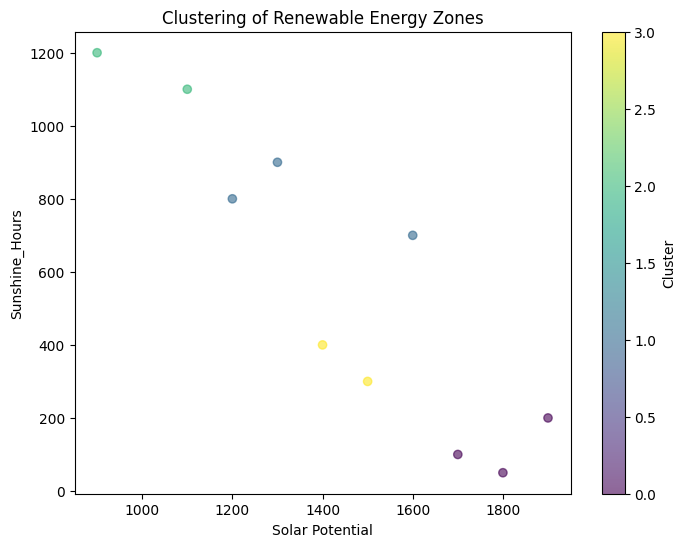

,City,Solar_Potential,Sunshine_Hours,Cluster
0,CityA,1500,300,3
1,CityB,1800,50,0
2,CityC,1200,800,1
3,CityD,1700,100,0
4,CityE,900,1200,2
5,CityF,1600,700,1
6,CityG,1400,400,3
7,CityH,1900,200,0
8,CityI,1300,900,1
9,CityJ,1100,1100,2


In [47]:
# Re-run clustering using the previous logic

from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Recreate the dataset structure based on previous processing steps
columns = ["City", "Solar_Potential", "Sunshine_Hours"]
dummy_data = [
    ["CityA", 1500, 300],
    ["CityB", 1800, 50],
    ["CityC", 1200, 800],
    ["CityD", 1700, 100],
    ["CityE", 900, 1200],
    ["CityF", 1600, 700],
    ["CityG", 1400, 400],
    ["CityH", 1900, 200],
    ["CityI", 1300, 900],
    ["CityJ", 1100, 1100],
]

# Convert to DataFrame
import pandas as pd
reconstructed_data = pd.DataFrame(dummy_data, columns=columns)

# Apply K-Means clustering
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
reconstructed_data["Cluster"] = kmeans.fit_predict(reconstructed_data[["Solar_Potential", "Sunshine_Hours"]])

# Scatter plot of clusters
plt.figure(figsize=(8,6))
plt.scatter(reconstructed_data["Solar_Potential"], reconstructed_data["Sunshine_Hours"], c=reconstructed_data["Cluster"], cmap="viridis", alpha=0.6)
plt.xlabel("Solar Potential")
plt.ylabel("Sunshine_Hours")
plt.title("Clustering of Renewable Energy Zones")
plt.colorbar(label="Cluster")
plt.show()

# Display clustered results
reconstructed_data
